<a href="https://colab.research.google.com/github/AbdurRahman22224/Fine-Tune-Stable-Diffusion-LORA/blob/main/BLIP_for_image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.makedirs('data', exist_ok = True)

In [ ]:
def load_dataset(data_dir):
    # List all images in the directory
    images = os.listdir(data_dir)

    # Create an empty list to store the data
    data = []

    for img in images:
        img_path = os.path.join(data_dir, img)
        if os.path.isfile(img_path):
            # Append the image path to the data list
            # data.append({"image": img_path})
            data.append(img_path)

    return data

In [ ]:
dt = load_dataset('/content/data')

In [ ]:
dt[:10]

['/content/data/3image-801.jpg',
 '/content/data/3image-841.jpg',
 '/content/data/3image-831.jpg',
 '/content/data/3image-888.jpg',
 '/content/data/3image-847.jpg',
 '/content/data/3image-872.jpg',
 '/content/data/3image-885.jpg',
 '/content/data/3image-827.jpg',
 '/content/data/3image-813.jpg',
 '/content/data/3image-806.jpg']

In [ ]:
dt = sorted(dt)

In [ ]:
import pandas as pd

df = pd.DataFrame(dt, columns = ['image'])

In [ ]:
# opening an image
from PIL import Image
img_path = '/content/data/3image-781.jpg'
raw_image = Image.open(img_path)

#### BLIP: Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation

In [ ]:
# using Blip from Hugging Face
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")


In [ ]:
text = []
for i in range (len(dt)):
  img_path = dt[i]
  raw_image = Image.open(img_path)
  # unconditional image captioning
  inputs = processor(raw_image, return_tensors="pt")

  out = model.generate(**inputs)
  text.append(processor.decode(out[0], skip_special_tokens=True))



/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [38]:
df = pd.DataFrame({
    'image': dt,
    'text': text
},index = None)

In [40]:
df.to_csv('mosque_data.csv', index = False)

In [41]:
!pip install datasets huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.3/607.3 kB 35.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.

In [3]:
!pip install huggingface_hub

In [6]:
import pandas as pd
df = pd.read_csv('/content/mosque_data.csv')

In [8]:
df.head()

,image,text
0,/content/data/3image-781.jpg,a mosque with a full moon in the background
1,/content/data/3image-782.jpg,a mosque at night with a full moon and stars
2,/content/data/3image-783.jpg,a large building with a tower and a clock on t...
3,/content/data/3image-784.jpg,arafed view of a large white building with a l...
4,/content/data/3image-785.jpg,a view of a large white building with a dome o...


In [9]:
from PIL import Image

In [11]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [12]:
from datasets import Dataset, Features, Image, Value
import os

In [14]:
from datasets import Value
def load_dataset(csv_file):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Create a Dataset from the DataFrame
    dataset = Dataset.from_pandas(df)

    # Define features for the dataset
    features = Features({
        "image": Image(),  # Define the image column as an Image feature
        "text": Value("string")  # Define the text column as a string
    })

    # Cast the dataset to use the defined features
    dataset = dataset.cast(features)

    return dataset

In [15]:

dataset = load_dataset('/content/mosque_data.csv')

Casting the dataset:   0%|          | 0/113 [00:00<?, ? examples/s]

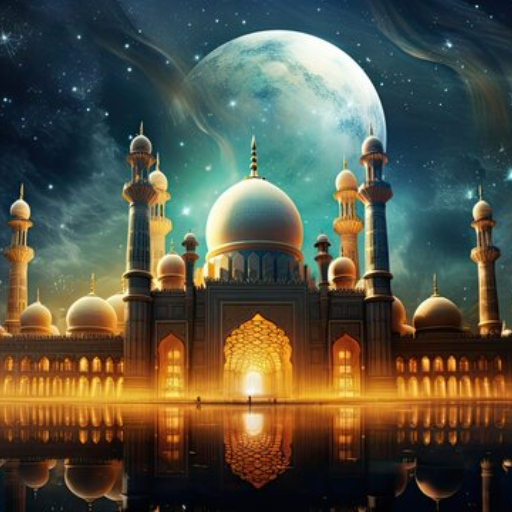

In [18]:
dataset['image'][0]